In [1]:
import tensorflow
from tensorflow.keras import models,layers,datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
(X_train , Y_train), (X_test,Y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

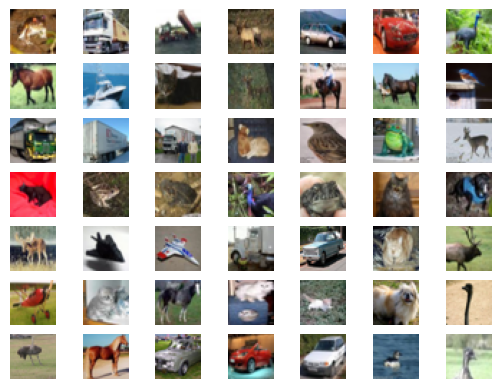

In [4]:
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.axis('off')
    plt.imshow(X_train[i])
plt.show()

In [5]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Conv2D,Flatten,Dropout,LeakyReLU
from keras.utils import plot_model


In [6]:
# NOTE : All hyperparameters are directly taken from research paper
def define_discriminator(in_shape = (32,32,3)):
    model = Sequential()
    model.add(Conv2D(64, (3,3) , padding="Same", input_shape = in_shape))
    model.add(LeakyReLU(alpha=0.2)) # 32x32

    #downsample
    # Using Strides instead of Maxpool is good practice when it comes to DCGANs
    model.add(Conv2D(128,(3,3), strides=(2,2), padding='same')) # 16x16
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(128,(3,3), strides=(2,2), padding='same')) # 8x8
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(256,(3,3), strides=(2,2), padding='same')) # 4x4
    model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation="sigmoid"))

    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy",optimizer=opt,metrics=['accuracy'])

    return model

In [7]:
model = define_discriminator()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

In [8]:
def load_real_samples():
    global X_train
    # This standardizez X between [-1,1]
    # This is also a good practice in DCGANs
    X = X_train.astype('float32')
    X = (X - 127.5)/127.5
    return X

In [9]:
X = load_real_samples()
X.shape

(50000, 32, 32, 3)

In [10]:
def generate_real_samples(dataset,n_samples):
    ix = np.random.randint(0,dataset.shape[0],n_samples)
    # NOTE : ix is an array of n_sample random numbers between 0, total number of samples
    X = dataset[ix] # This return all the values of dataset at indexes in ix

    y = np.ones((n_samples,1)) # generate [[1],[1],[1]....]
    # We only need to know if image is real or fake
    # No need to differentiate among real images

    return X,y


In [11]:
X,y = generate_real_samples(X,64)
X.shape

(64, 32, 32, 3)

In [12]:
y[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [13]:
# NOTE : This function is temporary, generating fake images will be done by generator
def generate_fake_samples(n_samples):
    # Generate random numbers between [0,1]
    X = np.random.randn(32*32*3*n_samples)

    # Standardize between [-1,1]
    X = -1 + X*2

    # Reshape into batches
    X = X.reshape((n_samples,32,32,3))

    # Generate n_sample 0s as all these are fake

    y = np.zeros((n_samples,1))
    return X,y

In [14]:
X,y = generate_fake_samples(64)
print(X.shape)
print(y[:5])

(64, 32, 32, 3)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


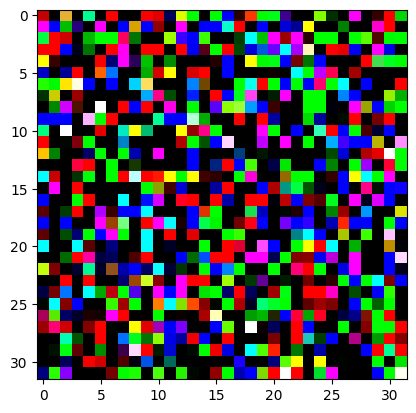

In [15]:
plt.imshow(X[0])

### THIS IS ONLY FOR TESTING DISCRIMINATOR

In [16]:
def train_discriminator(model,dataset,epochs=20,n_batch = 128):
    half_batch = n_batch//2

    for i in range(epochs):
        X_real,y_real = generate_real_samples(dataset,half_batch)
        _, real_acc = model.train_on_batch(X_real,y_real)

        X_fake, y_fake = generate_fake_samples(half_batch)
        _, fake_acc = model.train_on_batch(X_fake,y_fake)

        print(f"{i+1} : Real : {real_acc*100:.4f} Fake : {fake_acc*100:.4f}")


In [17]:
model = define_discriminator()
train_discriminator(model,X_train)

1 : Real : 82.8125 Fake : 34.3750
2 : Real : 100.0000 Fake : 71.8750
3 : Real : 100.0000 Fake : 100.0000
4 : Real : 100.0000 Fake : 100.0000
5 : Real : 100.0000 Fake : 100.0000
6 : Real : 100.0000 Fake : 100.0000
7 : Real : 100.0000 Fake : 100.0000
8 : Real : 100.0000 Fake : 100.0000
9 : Real : 100.0000 Fake : 100.0000
10 : Real : 100.0000 Fake : 100.0000
11 : Real : 100.0000 Fake : 100.0000
12 : Real : 100.0000 Fake : 100.0000
13 : Real : 100.0000 Fake : 100.0000
14 : Real : 100.0000 Fake : 100.0000
15 : Real : 100.0000 Fake : 100.0000
16 : Real : 100.0000 Fake : 100.0000
17 : Real : 100.0000 Fake : 100.0000
18 : Real : 100.0000 Fake : 100.0000
19 : Real : 100.0000 Fake : 100.0000
20 : Real : 100.0000 Fake : 100.0000


### Generator comes in here


In [18]:
from keras.layers import Conv2DTranspose, Reshape

In [19]:
def define_generator(latent_dim):
    model = Sequential()
    # foundation is 4x4 with 256 filters
    # This is the final convo2d layer of the discriminator
    n_nodes = 256*4*4
    model.add(Dense(n_nodes,input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4,4,256)))

    #upsample to 8x8
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding="same"))
    model.add(LeakyReLU(alpha=0.2))

    #upsample to 16x16
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding="same"))
    model.add(LeakyReLU(alpha=0.2))

    #upsample to 32x32
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding="same"))
    model.add(LeakyReLU(alpha=0.2))

    #ouput layer
    model.add(Conv2D(3,(3,3),activation="tanh",padding="same")) # Filter = 3 because RGB
    return model

In [20]:
latent_dim = 100 # This is just noise

model = define_generator(latent_dim)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 128)         524416    
 anspose)                                                        
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 16, 16, 128)       262272    
 Transpose)                                           

In [25]:
def generate_latent_points(latent_dim, n_samples):
  x_input = np.random.randn(latent_dim * n_samples)
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

In [26]:
x_input = generate_latent_points(latent_dim,64)
x_input.shape

(64, 100)

In [27]:
# This is the one used in generator
def generate_fake_samples(g_model,latent_dim,n_samples):
    x_input = generate_latent_points(latent_dim,n_samples)
    X = g_model.predict(x_input,verbose=0)
    y = np.zeros((n_samples,1))
    return X,y

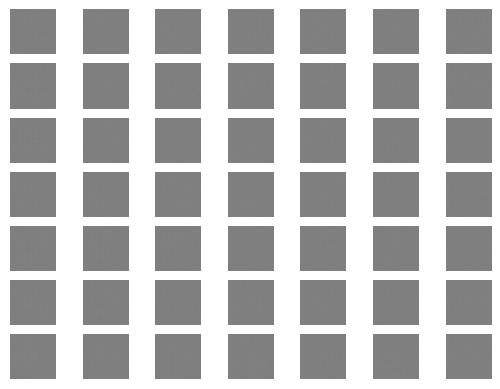

In [28]:
latent_dim = 100
model = define_generator(latent_dim)

n_samples = 49

X, _ = generate_fake_samples(model,latent_dim,n_samples)

#Scale pixel values from [-1,1] to [0,1]
X = (X+1)/2.0

for i in range(n_samples):
    plt.subplot(7,7,i+1)
    plt.axis('off')
    plt.imshow(X[i])
plt.show()

## Training

In [29]:
def define_gan(g_model,d_model):
    # Make weights in d_model untrainable
    # As this model is intented only to train Generator
    # Discriminator will be tranied seperately in a different fashion
    d_model.trainable = False
    model = Sequential()
    model.add(g_model)
    model.add(d_model)

    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy",optimizer=opt)
    return model

In [30]:
# NOTE : Never fully train a discriminator first as it would make it impossible for Generator to learn

In [31]:
d_model = define_discriminator() # This takes half real half fake to train discriminator

g_model = define_generator(latent_dim)

gan_model = define_gan(g_model,d_model) # composite model to train Generator)

gan_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         1466115   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 1988612 (7.59 MB)
Trainable params: 1466115 (5.59 MB)
Non-trainable params: 522497 (1.99 MB)
_________________________________________________________________


In [32]:
from google.colab import files
def save_plot(examples,epoch,n=7):
    # Scaling from [-1,1] to [0,1]
    examples = (examples +1)/2.0

    #plot images
    for i in range(n*n):
        plt.subplot(n,n,i+1)
        plt.axis('off')
        plt.imshow(examples[i])
    filename = f'generated_plot_{epoch+1}.png'
    plt.savefig(filename)
    files.download(filename)
    plt.close()

In [33]:
def summarize_performance(epoch,g_model,d_model,dataset,latent_dim,n_samples=150):
    X_real, y_real = generate_real_samples(dataset,n_samples)

    _,acc_real = d_model.evaluate(X_real,y_real,verbose=0)

    X_fake, y_fake = generate_fake_samples(g_model,latent_dim,n_samples)

    _, acc_fake = d_model.evaluate(X_fake,y_fake, verbose=0)

    print(f"Accuracy real : {acc_real:.4f}, Accuracy Fake : {acc_fake:.4f}")

    save_plot(X_fake,epoch)



In [38]:
def train(g_model,d_model,gan_model,dataset,latent_dim,n_epochs=100,n_batch=128):
    batch_per_epo = dataset.shape[0]//n_batch
    half_batch = n_batch//2

    for i in range(n_epochs):
        for j in range(batch_per_epo):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            X_gan = generate_latent_points(latent_dim, n_batch)
            y_gan = np.ones((n_batch, 1))
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            print(f"{i+1} , {j+1}/{batch_per_epo}, d_real_loss = {d_loss1:.3f}, d_fake_loss = {d_loss2:.3f}, g_loss = {g_loss:.3f}")
        if (i+1)%10 == 0:
            summarize_performance(i,g_model,d_model,dataset,latent_dim,n_samples=150)



In [39]:
X = load_real_samples()
train(g_model,d_model,gan_model,X,latent_dim)

1 , 1/390, d_real_loss = 0.791, d_fake_loss = 0.494, g_loss = 1.160
1 , 2/390, d_real_loss = 0.706, d_fake_loss = 0.538, g_loss = 1.046
1 , 3/390, d_real_loss = 0.738, d_fake_loss = 0.609, g_loss = 1.058
1 , 4/390, d_real_loss = 0.701, d_fake_loss = 0.551, g_loss = 1.025
1 , 5/390, d_real_loss = 0.678, d_fake_loss = 0.566, g_loss = 1.082
1 , 6/390, d_real_loss = 0.679, d_fake_loss = 0.559, g_loss = 1.021
1 , 7/390, d_real_loss = 0.719, d_fake_loss = 0.641, g_loss = 0.975
1 , 8/390, d_real_loss = 0.706, d_fake_loss = 0.632, g_loss = 1.038
1 , 9/390, d_real_loss = 0.670, d_fake_loss = 0.631, g_loss = 0.974
1 , 10/390, d_real_loss = 0.732, d_fake_loss = 0.695, g_loss = 0.997
1 , 11/390, d_real_loss = 0.727, d_fake_loss = 0.704, g_loss = 0.986
1 , 12/390, d_real_loss = 0.766, d_fake_loss = 0.708, g_loss = 1.041
1 , 13/390, d_real_loss = 0.807, d_fake_loss = 0.638, g_loss = 1.060
1 , 14/390, d_real_loss = 0.870, d_fake_loss = 0.611, g_loss = 1.043
1 , 15/390, d_real_loss = 0.703, d_fake_los

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

11 , 1/390, d_real_loss = 0.540, d_fake_loss = 0.601, g_loss = 1.070
11 , 2/390, d_real_loss = 0.642, d_fake_loss = 0.600, g_loss = 1.149
11 , 3/390, d_real_loss = 0.661, d_fake_loss = 0.565, g_loss = 1.176
11 , 4/390, d_real_loss = 0.727, d_fake_loss = 0.554, g_loss = 1.103
11 , 5/390, d_real_loss = 0.690, d_fake_loss = 0.516, g_loss = 1.115
11 , 6/390, d_real_loss = 0.570, d_fake_loss = 0.616, g_loss = 1.077
11 , 7/390, d_real_loss = 0.645, d_fake_loss = 0.588, g_loss = 1.116
11 , 8/390, d_real_loss = 0.676, d_fake_loss = 0.573, g_loss = 1.086
11 , 9/390, d_real_loss = 0.695, d_fake_loss = 0.549, g_loss = 1.101
11 , 10/390, d_real_loss = 0.708, d_fake_loss = 0.522, g_loss = 1.102
11 , 11/390, d_real_loss = 0.629, d_fake_loss = 0.531, g_loss = 1.106
11 , 12/390, d_real_loss = 0.673, d_fake_loss = 0.553, g_loss = 1.108
11 , 13/390, d_real_loss = 0.651, d_fake_loss = 0.508, g_loss = 1.057
11 , 14/390, d_real_loss = 0.698, d_fake_loss = 0.567, g_loss = 1.042
11 , 15/390, d_real_loss = 0.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

21 , 1/390, d_real_loss = 0.691, d_fake_loss = 0.695, g_loss = 0.811
21 , 2/390, d_real_loss = 0.740, d_fake_loss = 0.658, g_loss = 0.820
21 , 3/390, d_real_loss = 0.698, d_fake_loss = 0.669, g_loss = 0.830
21 , 4/390, d_real_loss = 0.664, d_fake_loss = 0.719, g_loss = 0.854
21 , 5/390, d_real_loss = 0.673, d_fake_loss = 0.615, g_loss = 0.888
21 , 6/390, d_real_loss = 0.693, d_fake_loss = 0.608, g_loss = 0.893
21 , 7/390, d_real_loss = 0.637, d_fake_loss = 0.601, g_loss = 0.888
21 , 8/390, d_real_loss = 0.664, d_fake_loss = 0.626, g_loss = 0.798
21 , 9/390, d_real_loss = 0.690, d_fake_loss = 0.736, g_loss = 0.803
21 , 10/390, d_real_loss = 0.684, d_fake_loss = 0.688, g_loss = 0.852
21 , 11/390, d_real_loss = 0.667, d_fake_loss = 0.656, g_loss = 0.846
21 , 12/390, d_real_loss = 0.641, d_fake_loss = 0.649, g_loss = 0.840
21 , 13/390, d_real_loss = 0.659, d_fake_loss = 0.619, g_loss = 0.843
21 , 14/390, d_real_loss = 0.650, d_fake_loss = 0.706, g_loss = 0.816
21 , 15/390, d_real_loss = 0.

KeyboardInterrupt: ignored